In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
cs_df = pd.read_csv('../data/cs_data.csv')

In [34]:
cs_df

,Case Number,Case Owner Role,Date/Time Solved (PST),Type,Platform,Feature,Reason Code,Closure Code
0,569956,Tier 3,1/27/21 13:57,Incident,Online Ordering,Order,Data mismatch/missing/not included,Resolved by change process (known issue)
1,1011353,Tier 2,1/3/21 0:32,Incident,Management Console,Employees,Not Showing/updating,Resolved by change process (known issue)
2,1005948,Tier 2,1/20/21 14:10,Incident,Management Console,Employees,Not Showing/updating,Resolved by change process (known issue)
3,775905,Tier 3,1/27/21 13:43,Incident,Management Console,Employees,Data mismatch/missing/not included,Resolved by change process (known issue)
4,1093109,Tier 3,1/27/21 13:21,Incident,Online Ordering,Inventory,Data mismatch/missing/not included,Advice/Training provided
...,...,...,...,...,...,...,...,...
17840,1123716,Tier 2,1/27/21 12:28,Incident,Management Console,Reporting,Data transmission service disorder,Resolved by change process (known issue)
17841,1123400,Tier 2,1/28/21 7:19,Incident,Management Console,Inventory,Data mismatch/missing/not included,Resolved by change process (known issue)
17842,1121491,Tier 2,1/28/21 6:04,Incident,Online Ordering,Order,Data transmission service disorder,Resolved by change process (known issue)
17843,679777,Tier 2,1/8/21 6:40,Incident,NaN,Hardware / Networking,Data transmission service disorder,Resolved by change process (known issue)


In [35]:

cs_df['Date/Time Solved (PST)'] =  pd.to_datetime(cs_df['Date/Time Solved (PST)'])
cs_df['Date/Time Solved (PST)'].head()

0   2021-01-27 13:57:00
1   2021-01-03 00:32:00
2   2021-01-20 14:10:00
3   2021-01-27 13:43:00
4   2021-01-27 13:21:00
Name: Date/Time Solved (PST), dtype: datetime64[ns]

In [36]:
#find duplicate rows across all columns
duplicateRows = cs_df.duplicated()

In [37]:
#find duplicate rows across Case Number column
duplicateRows = cs_df[cs_df.duplicated(['Case Number'])]
duplicateRows

,Case Number,Case Owner Role,Date/Time Solved (PST),Type,Platform,Feature,Reason Code,Closure Code


In [38]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17845 entries, 0 to 17844
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             17845 non-null  int64         
 1   Case Owner Role         17845 non-null  object        
 2   Date/Time Solved (PST)  17845 non-null  datetime64[ns]
 3   Type                    17845 non-null  object        
 4   Platform                12788 non-null  object        
 5   Feature                 17845 non-null  object        
 6   Reason Code             17845 non-null  object        
 7   Closure Code            17845 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 697.1+ KB


In [39]:
cs_df.isna().sum()

Case Number                  0
Case Owner Role              0
Date/Time Solved (PST)       0
Type                         0
Platform                  5057
Feature                      0
Reason Code                  0
Closure Code                 0
dtype: int64

In [40]:
cs_df["Platform"].fillna("No Platform", inplace = True)

In [41]:
cs_df.isna().sum()

Case Number               0
Case Owner Role           0
Date/Time Solved (PST)    0
Type                      0
Platform                  0
Feature                   0
Reason Code               0
Closure Code              0
dtype: int64

In [42]:
type_count = cs_df.Type.value_counts()
type_count

Question    10585
Incident     7119
Task          124
Problem        17
Name: Type, dtype: int64

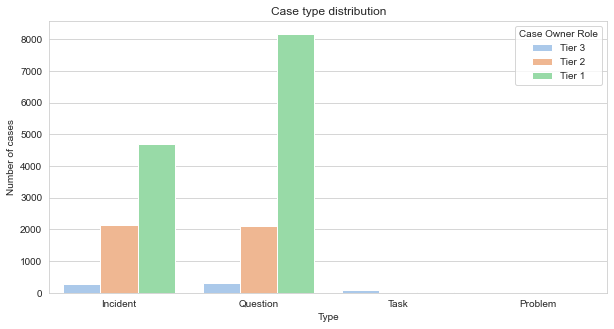

In [43]:
fig = plt.figure(figsize = (10, 5))
sns.countplot(x="Type", data=cs_df ,palette='pastel', hue='Case Owner Role' )
plt.xlabel("Type")
plt.ylabel("Number of cases")
plt.title("Case type distribution")
plt.show()

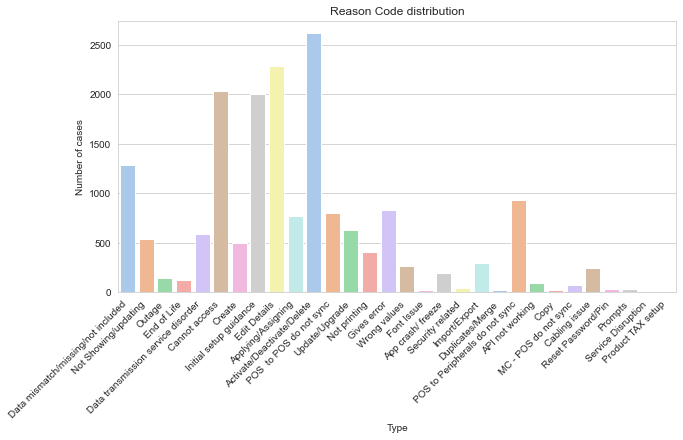

In [44]:
fig = plt.figure(figsize = (10, 5))
ax = sns.countplot(x="Reason Code", data=cs_df ,palette='pastel' )
ax.set_xticklabels(ax.get_xticklabels(),rotation =45 , horizontalalignment='right')
plt.xlabel("Type")
plt.ylabel("Number of cases")
plt.title("Reason Code distribution")
plt.show()

In [45]:
cs_df.Platform.value_counts()

No Platform                                         8306
Management Console                                  5566
POS                                                 1996
Online Ordering                                      907
KDS                                                  193
Revel Guard XT                                       166
3rd Party Integrations/API - Order                   138
CDS                                                  126
3rd Party Integrations/API - Reporting               107
Online Ordering XT                                    70
Delivery XT                                           50
Insights App                                          41
Inventory App                                         33
Peripherals/Hardware                                  32
Kiosk                                                 19
Custom Commerce                                       17
3rd Party Integrations/API - Employees                16
CDS XT                         

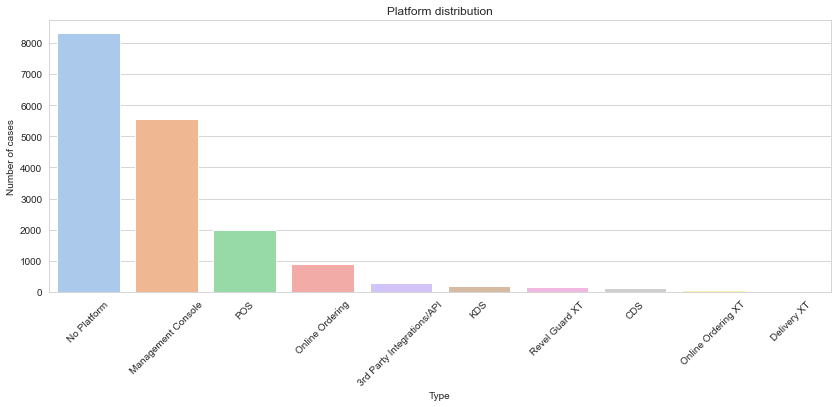

In [46]:
fig = plt.figure(figsize = (14, 5))
aggregated_platform = cs_df.Platform.apply(lambda x: '3rd Party Integrations/API' if '3rd Party Integrations/API' in x else x).value_counts()[:10]
ax = sns.barplot(x = aggregated_platform.index, y = aggregated_platform.values, palette='pastel' )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.xlabel("Type")
plt.ylabel("Number of cases")
plt.title("Platform distribution")
plt.show()

In [47]:
cs_df.Feature.value_counts()

Hardware / Networking              7628
Order                              1822
Establishment Details              1317
Product Details                    1287
Payments                           1264
Reporting                          1228
Employees                          1074
Loyalty/Gift                        502
Inventory                           427
Receipts                            414
Discounts                           319
Taxes                               191
Customer Management                 145
Delivery Management                  74
Cash Management/Tills                69
Vertical Settings/Branding Tool      63
Shipping                             21
Name: Feature, dtype: int64

In [48]:
cs_df['Reason Code'].unique()

array(['Data mismatch/missing/not included', 'Not Showing/updating',
       'Outage', 'End of Life', 'Data transmission service disorder',
       'Cannot access', 'Create', 'Initial setup guidance',
       'Edit Details', 'Applying/Assigning', 'Activate/Deactivate/Delete',
       'POS  to POS do not sync', 'Update/Upgrade', 'Not printing',
       'Gives error', 'Wrong values', 'Font Issue', 'App crash/ freeze',
       'Security related', 'Import/Export', 'Duplicates/Merge',
       'POS to Peripherals do not sync', 'API not working', 'Copy',
       'MC - POS do not sync', 'Cabling issue', 'Reset Password/Pin',
       'Prompts', 'Service Disruption', 'Product TAX setup'], dtype=object)

In [49]:
cases_count_by_weekday = cs_df["Date/Time Solved (PST)"].dt.weekday.value_counts()
cases_count_by_hour_of_day = cs_df["Date/Time Solved (PST)"].dt.hour.value_counts()

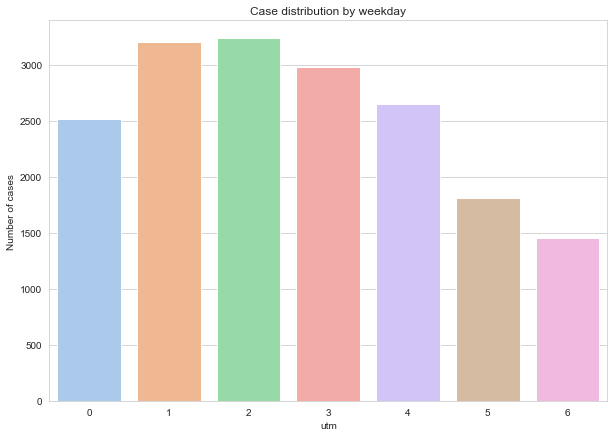

In [50]:
fig = plt.figure(figsize = (10, 7))
sns.barplot(x = cases_count_by_weekday.index, y = cases_count_by_weekday.values, palette='pastel')
plt.xlabel("utm")
plt.ylabel("Number of cases")
plt.title("Case distribution by weekday")
plt.show()

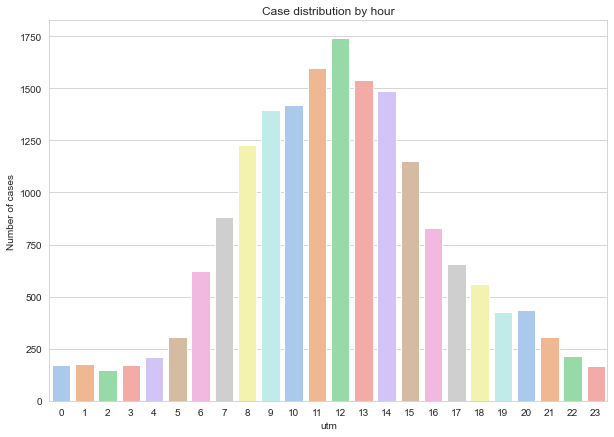

In [51]:
fig = plt.figure(figsize=(10, 7))
sns.barplot(x=cases_count_by_hour_of_day.index, y=cases_count_by_hour_of_day.values, palette='pastel')
plt.xlabel("utm")
plt.ylabel("Number of cases")
plt.title("Case distribution by hour")
plt.show()

In [52]:
training_data = cs_df.loc[cs_df['Closure Code'] == 'Advice/Training provided']
training_data

,Case Number,Case Owner Role,Date/Time Solved (PST),Type,Platform,Feature,Reason Code,Closure Code
4,1093109,Tier 3,2021-01-27 13:21:00,Incident,Online Ordering,Inventory,Data mismatch/missing/not included,Advice/Training provided
7,1324503,Tier 1,2021-01-21 14:42:00,Question,Management Console,Establishment Details,End of Life,Advice/Training provided
12,1324462,Tier 1,2021-01-21 14:09:00,Incident,Management Console,Establishment Details,Cannot access,Advice/Training provided
14,1320668,Tier 1,2021-01-17 17:17:00,Question,Online Ordering,Establishment Details,Data mismatch/missing/not included,Advice/Training provided
15,1316691,Tier 1,2021-01-12 12:25:00,Question,Management Console,Employees,Create,Advice/Training provided
...,...,...,...,...,...,...,...,...
17751,1264290,Tier 2,2021-01-13 18:30:00,Question,Management Console,Reporting,Wrong values,Advice/Training provided
17784,1282424,Tier 2,2020-12-15 06:48:00,Incident,KDS,Product Details,Data mismatch/missing/not included,Advice/Training provided
17813,1248140,Tier 3,2021-01-19 14:00:00,Incident,KDS,Order,Not Showing/updating,Advice/Training provided
17818,1293460,Tier 3,2020-12-21 15:37:00,Question,Management Console,Product Details,Edit Details,Advice/Training provided


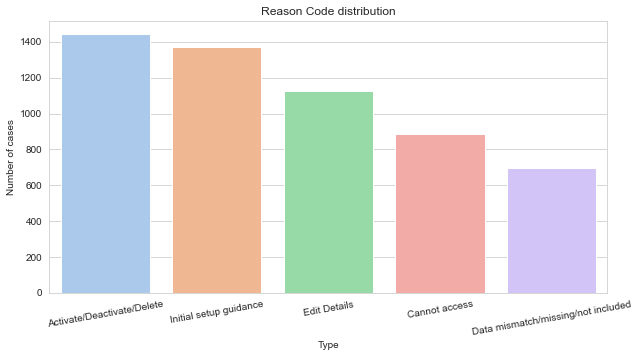

In [53]:
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Reason Code", data=training_data, palette='pastel', order = training_data["Reason Code"].value_counts().iloc[:5].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
plt.xlabel("Type")
plt.ylabel("Number of cases")
plt.title("Reason Code distribution")
plt.show()

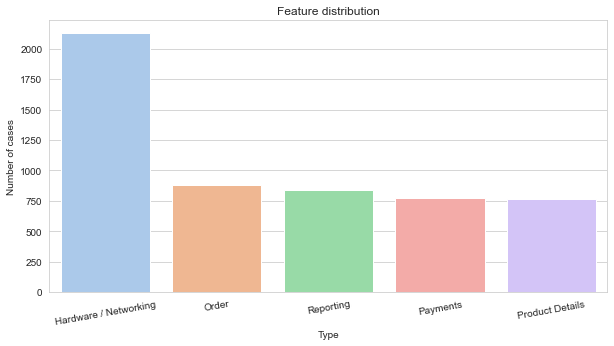

In [54]:
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Feature", data=training_data, palette='pastel', order = training_data["Feature"].value_counts().iloc[:5].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
plt.xlabel("Type")
plt.ylabel("Number of cases")
plt.title("Feature distribution")
plt.show()

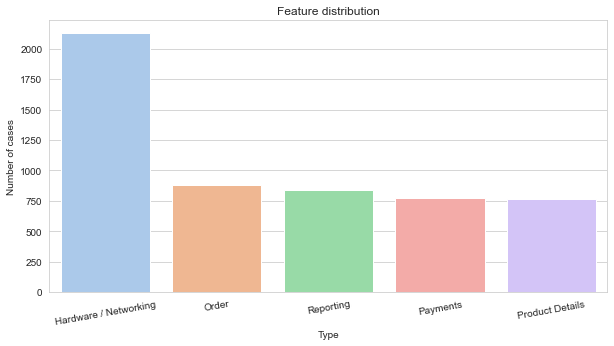

In [55]:
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Feature", data=training_data, palette='pastel', order = training_data["Feature"].value_counts().iloc[:5].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
plt.xlabel("Type")
plt.ylabel("Number of cases")
plt.title("Feature distribution")
plt.show()

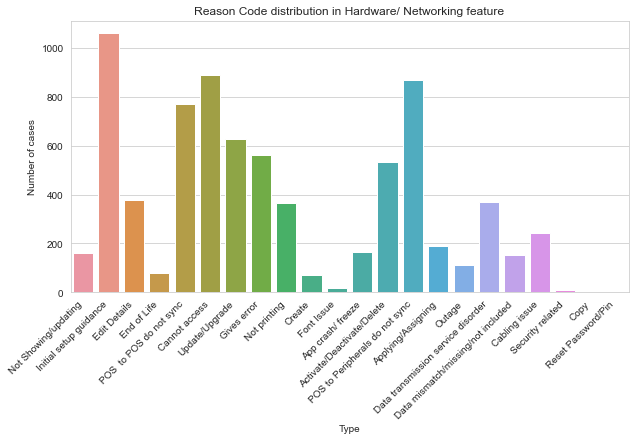

In [56]:
feature_hardware_date = cs_df.loc[cs_df['Feature'] == 'Hardware / Networking']
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Reason Code", data=feature_hardware_date )
ax.set_xticklabels(ax.get_xticklabels(),rotation =45 , horizontalalignment='right')
plt.xlabel("Type")
plt.ylabel("Number of cases")
plt.title("Reason Code distribution in Hardware/ Networking feature")
plt.show()

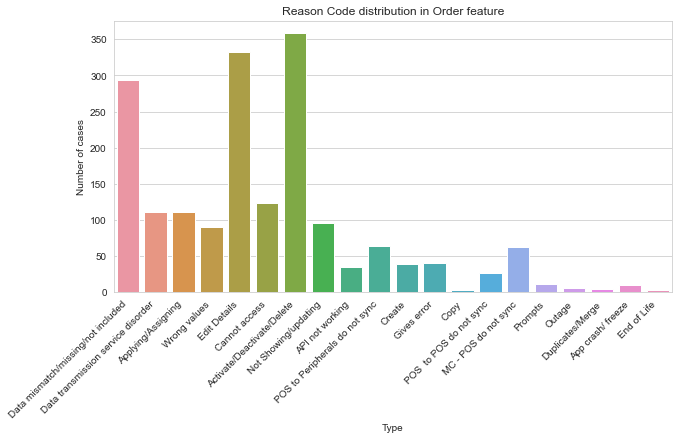

In [57]:
feature_order_date = cs_df.loc[cs_df['Feature'] == 'Order']
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Reason Code", data=feature_order_date )
ax.set_xticklabels(ax.get_xticklabels(),rotation =45 , horizontalalignment='right')
plt.xlabel("Type")
plt.ylabel("Number of cases")
plt.title("Reason Code distribution in Order feature")
plt.show()